## Transfer Learning ##
Çok büyük veri setleri üzerinde eğitilmiş DL mimarilerini çalışmalarımızda kullanmak için izlediğimiz bir yöntem.
Eğitilmiş bir modeli transfer ediyoruz.

## Kütüphaneleri Yükle ##

In [1]:
from tensorflow.keras.applications.resnet import ResNet50,preprocess_input, decode_predictions

2024-06-29 16:00:31.405556: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 16:00:31.405748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 16:00:31.581186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np

In [4]:
kaan='/kaggle/input/uak-foto/kaan.jpg'
savas_ucagi='/kaggle/input/uak-foto/savas ucagi.jpg'

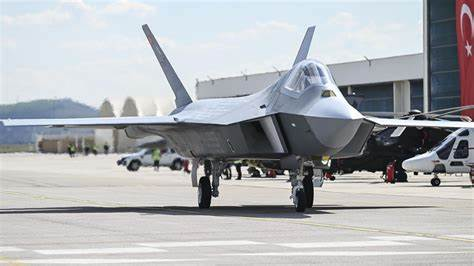

In [5]:
from PIL import Image
#resmi yükle
img=Image.open(kaan)
img

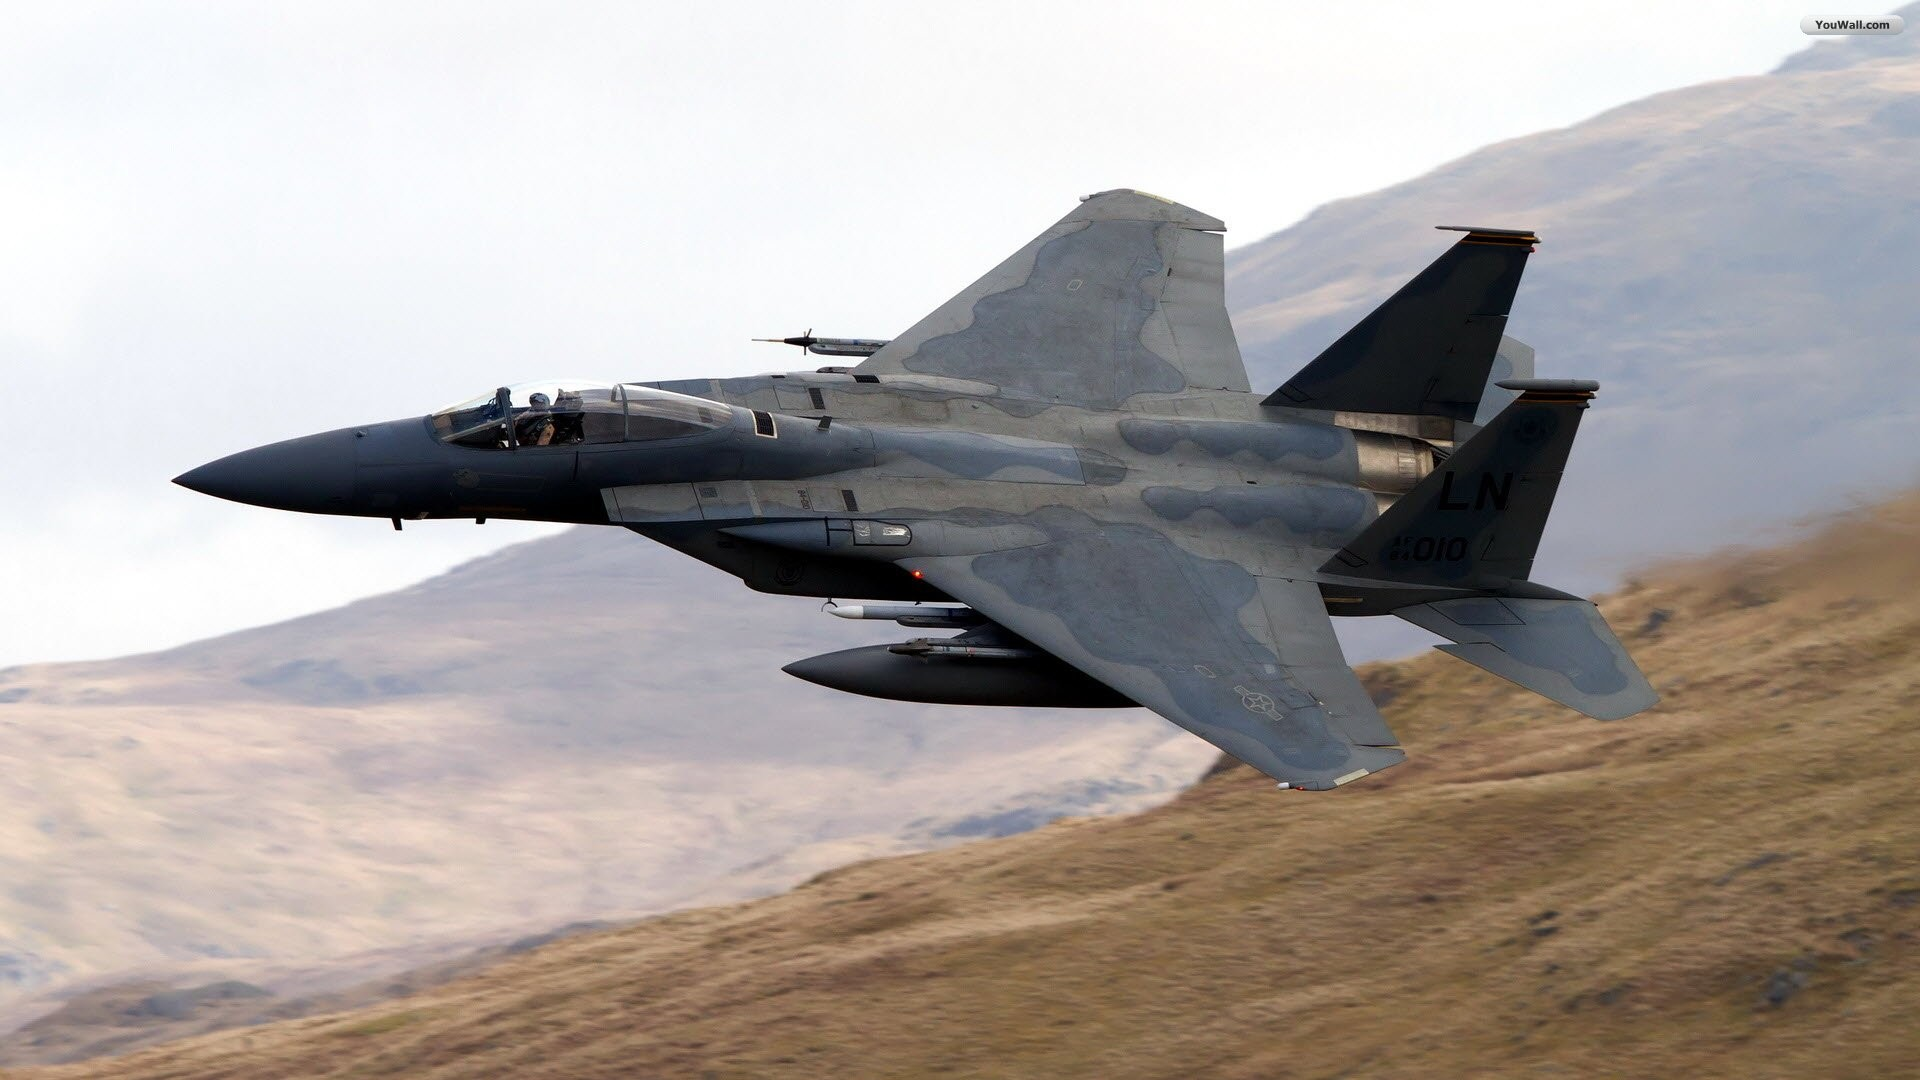

In [6]:
img=Image.open(savas_ucagi)
img

## Modeli Tanımla ##

In [7]:
model=ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
def img_preprocessing(img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [9]:
# görüntü ön işleme
img1=img_preprocessing(kaan)

In [10]:
#Model tahmi etsin
pred=model.predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [11]:
pred

array([[9.21930265e-09, 6.05011108e-09, 2.37626705e-06, 2.30557657e-06,
        5.77422441e-07, 2.70360829e-07, 2.46345508e-07, 2.25704252e-06,
        6.12062934e-07, 8.33988665e-08, 5.16975796e-08, 1.52625219e-08,
        4.69435776e-07, 1.37474998e-07, 4.41259296e-08, 1.14528753e-07,
        1.20878013e-07, 1.45196722e-07, 4.58720081e-07, 1.80440040e-07,
        1.47706487e-07, 2.42108001e-07, 9.81371358e-08, 3.64506207e-07,
        1.25678270e-07, 3.30045111e-08, 5.07542559e-08, 1.75387971e-08,
        2.42067006e-08, 1.77204758e-08, 3.69222874e-08, 3.19921192e-08,
        9.97087657e-09, 1.55719576e-07, 1.36473474e-07, 3.16564666e-07,
        4.34173643e-07, 3.50737288e-08, 8.73322303e-09, 1.57460221e-07,
        6.65510100e-08, 1.49379908e-09, 1.35471421e-08, 2.81458568e-07,
        9.18052763e-08, 1.74494730e-08, 3.86168653e-09, 9.01349253e-08,
        9.26674844e-08, 1.87766489e-07, 9.96971252e-08, 7.02516059e-04,
        8.02600297e-09, 2.25122188e-09, 4.40536070e-08, 3.410911

In [12]:
pred.shape

(1, 1000)

In [13]:
print ('Verilen ögrüntü:', kaan,decode_predictions(pred))

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Verilen ögrüntü: /kaggle/input/uak-foto/kaan.jpg [[('n04552348', 'warplane', 0.8648437), ('n02687172', 'aircraft_carrier', 0.08185259), ('n04266014', 'space_shuttle', 0.01807193), ('n04592741', 'wing', 0.015381392), ('n02690373', 'airliner', 0.0062830215)]]


In [14]:
print ('Verilen görüntü:', kaan,decode_predictions(pred,top=1))

Verilen görüntü: /kaggle/input/uak-foto/kaan.jpg [[('n04552348', 'warplane', 0.8648437)]]


In [15]:
img2=img_preprocessing(savas_ucagi)
pred=model.predict(img2)
print ('Verilen görüntü:', savas_ucagi,decode_predictions(pred,top=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Verilen görüntü: /kaggle/input/uak-foto/savas ucagi.jpg [[('n04552348', 'warplane', 0.98574775)]]


## Kaynak ##
https://github.com/BigWZhu/ResNet50/tree/master